In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("housing.csv", delimiter=r"\s+", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

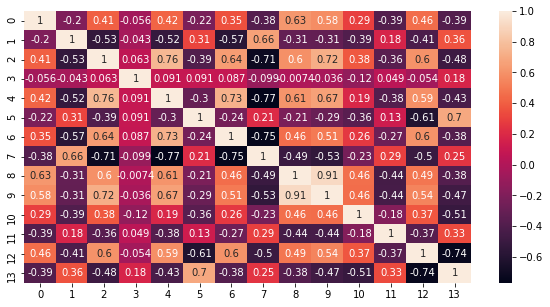

In [13]:
import seaborn as sns
corr_matrix = data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True)

i am plotting corelation matrix of data and i found that the 5th column i.e, 
rm average number of rooms per dwelling has a strong corelation of 0.7 with the 
13th column that is medv median value of owner-occupied homes in $1000s. So i am picking 5th column to predict 13th column

In [38]:
X = data.iloc[:,5]
y = data.iloc[:,13]

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
reg = LinearRegression()
reg.fit(x_train.values.reshape(-1,1),y_train)

LinearRegression()

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = reg.predict(x_test.values.reshape(-1,1))
rmse_Score = mean_squared_error(y_test,y_pred, squared=False)
r2_Score = r2_score(y_test,y_pred)

print("rmse score of the data: ", rmse_Score)
print("r2 score of the data: ", r2_Score)

rmse score of the data:  6.383135112649168
r2 score of the data:  0.5877214395051774


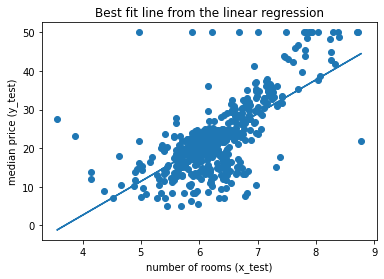

In [52]:
y_predicted = reg.predict(X.values.reshape(-1,1))
plt.scatter(X,y)
plt.plot(X,y_predicted)
plt.title("Best fit line from the linear regression")
plt.xlabel("number of rooms (x_test)")
plt.ylabel("median price (y_test)")
plt.show()

In [122]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X.values.reshape(-1,1))


In [123]:
X_poly.shape

(506, 3)

In [124]:
x_train, x_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=1)


In [125]:
reg_poly = LinearRegression()
reg_poly.fit(x_train,y_train)

LinearRegression()

In [126]:
y_pred = reg_poly.predict(x_test)
rmse_Score_poly = mean_squared_error(y_test,y_pred, squared=False)
r2_Score_poly = r2_score(y_test,y_pred)

print("rmse score of the data: ", rmse_Score_poly)
print("r2 score of the data: ", r2_Score_poly)

rmse score of the data:  5.799858200692183
r2 score of the data:  0.6596251774934456


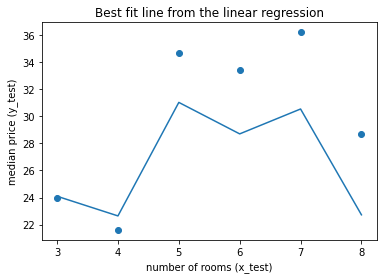

In [127]:

y_predicted = reg_poly.predict(X_poly)
x_space = np.arange(3, 9, 1)
plt.scatter(x_space,y[0:6])
plt.plot(x_space,y_predicted[0:6])
plt.title("Best fit line from the linear regression")
plt.xlabel("number of rooms (x_test)")
plt.ylabel("median price (y_test)")
plt.show()

In [128]:
poly_20 = PolynomialFeatures(degree=20)
X_poly_20 = poly.fit_transform(X.values.reshape(-1,1))

In [129]:
x_train, x_test, y_train, y_test = train_test_split(X_poly_20, y, test_size=0.2, random_state=1)


In [130]:
reg_poly_20 = LinearRegression()
reg_poly_20.fit(x_train,y_train)

LinearRegression()

In [131]:
y_pred = reg_poly_20.predict(x_test)
rmse_Score_poly_20 = mean_squared_error(y_test,y_pred, squared=False)
r2_Score_poly_20 = r2_score(y_test,y_pred)

print("rmse score of the data: ", rmse_Score_poly_20)
print("r2 score of the data: ", r2_Score_poly_20)

rmse score of the data:  5.799858200692183
r2 score of the data:  0.6596251774934456


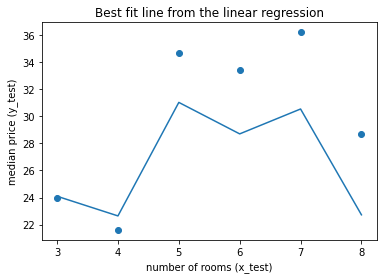

In [132]:

y_predicted = reg_poly_20.predict(X_poly_20)
x_space = np.arange(3, 9, 1)
plt.scatter(x_space,y[0:6])
plt.plot(x_space,y_predicted[0:6])
plt.title("Best fit line from the linear regression")
plt.xlabel("number of rooms (x_test)")
plt.ylabel("median price (y_test)")
plt.show()

In [112]:
x_multiple = data.iloc[:,[5,11,12]]
y = data.iloc[:,13]

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x_multiple, y, test_size=0.2, random_state=1)
reg_multiple = LinearRegression()
reg_multiple.fit(x_train,y_train)

LinearRegression()

In [117]:
y_pred = reg_multiple.predict(x_test)
rmse_Score_multiple = mean_squared_error(y_test,y_pred, squared=False)
r2_Score_multiple = r2_score(y_test,y_pred)

print("rmse score of the data: ", rmse_Score_multiple)
print("r2 score of the data: ", r2_Score_multiple)

rmse score of the data:  5.474914616536909
r2 score of the data:  0.6966965309874333
